In [6]:
import pandas as pd

In [9]:
white_wine = pd.read_csv('./winequality_data/winequality-white.csv',sep=';')

In [31]:
row_count = sum(1 for row in white_wine)
row_count

12

In [10]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [227]:
white_wine['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [264]:
white_wine.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [268]:
len(white_wine)

4898

In [265]:
red_wine =  pd.read_csv('./winequality_data/winequality-red.csv',sep=";")

In [267]:
red_wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [40]:
len(red_wine)

1599

In [41]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5


In [16]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [89]:
red_wine.rename(columns ={'fixed acidity':'fixed_acidity'},inplace=True)
red_wine.rename(columns ={'volatile acidity':'volatile_acidity'},inplace=True)
red_wine.rename(columns ={'citric acid':'citric_acid'},inplace=True)
red_wine.rename(columns ={'residual sugar':'residual_sugar'},inplace=True)
red_wine.rename(columns ={'free sulfur dioxide':'free_sulfur_dioxide'},inplace=True)
red_wine.rename(columns ={'total sulfur dioxide':'total_sulfur_dioxide'},inplace=True)

In [90]:
red_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5


In [91]:
cols_to_norm = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

## normalize the data

In [92]:
red_wine[cols_to_norm] = red_wine[cols_to_norm].apply(lambda x: (x-x.min())/ (x.max() -x.min()))

In [93]:
red_wine.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [94]:
red_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [95]:
fixed_acidity = tf.feature_column.numeric_column("fixed_acidity")
volatile_acidity = tf.feature_column.numeric_column("volatile_acidity")
citric_acid = tf.feature_column.numeric_column("citric_acid")
residual_sugar = tf.feature_column.numeric_column("residual_sugar")
chlorides = tf.feature_column.numeric_column("chlorides")
free_sulfur_dioxide= tf.feature_column.numeric_column("free_sulfur_dioxide")
total_sulfur_dioxide =tf.feature_column.numeric_column("total_sulfur_dioxide")
density= tf.feature_column.numeric_column("density")
pH=tf.feature_column.numeric_column("pH")
sulphates=tf.feature_column.numeric_column("sulphates")
alcohol=tf.feature_column.numeric_column("alcohol")


_NumericColumn(key='fixed acidity', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)

In [120]:
assigned_quality = tf.feature_column.categorical_column_with_vocabulary_list('quality',[5,6,7,4,8,3])
assigned_quality

_VocabularyListCategoricalColumn(key='quality', vocabulary_list=(5, 6, 7, 4, 8, 3), dtype=tf.int64, default_value=-1, num_oov_buckets=0)

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

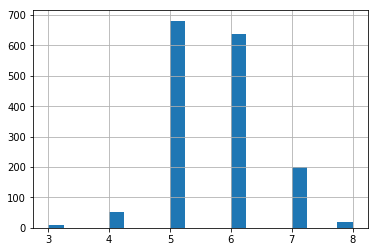

In [98]:
red_wine['quality'].hist(bins=20)

In [121]:
feat_cols =[fixed_acidity,volatile_acidity
            ,citric_acid,residual_sugar,
            chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,
            pH,sulphates,alcohol]

## Train test split

In [122]:
x_data = red_wine.drop('quality',axis=1)

In [123]:
x_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [242]:
labels = red_wine['quality']
red_wine['quality'].unique()

string_labels = red_wine['quality'].apply(str)
string_labels = string_labels.unique()
string_labels = string_labels.tolist()

red_wine['quality'].dtypes
string_labels
red_labels = [0,1,2,3,4,5,6,7,8,9]

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
x_train, x_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.3, random_state = 101)
len(x_train)

1119

In [245]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train, batch_size=10,num_epochs =1000, shuffle=True)

In [246]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=10)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_train_distribute': None, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0xb1f4fb400>, '_save_checkpoints_steps': None, '_device_fn': None, '_model_dir': '/var/folders/f4/z_yn047s6qgd41kd152s8zpm0000gn/T/tmpnjne7vj9', '_task_type': 'worker', '_num_worker_replicas': 1, '_save_summary_steps': 100, '_global_id_in_cluster': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_master': '', '_evaluation_master': '', '_task_id': 0, '_num_ps_replicas': 0, '_service': None, '_is_chief': True, '_tf_random_seed': None}


In [247]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/f4/z_yn047s6qgd41kd152s8zpm0000gn/T/tmpnjne7vj9/model.ckpt.
INFO:tensorflow:loss = 23.025852, step = 1
INFO:tensorflow:global_step/sec: 310.416
INFO:tensorflow:loss = 9.982389, step = 101 (0.326 sec)
INFO:tensorflow:global_step/sec: 522.939
INFO:tensorflow:loss = 9.237083, step = 201 (0.190 sec)
INFO:tensorflow:global_step/sec: 540.178
INFO:tensorflow:loss = 9.47562, step = 301 (0.185 sec)
INFO:tensorflow:global_step/sec: 527.755
INFO:tensorflow:loss = 10.1788435, step = 401 (0.190 sec)
INFO:tensorflow:global_step/sec: 546.171
INFO:tensorflow:loss = 10.602678, step = 501 (0.184 sec)
INFO:tensorflow:global_step/sec: 534.608
INFO:tensorflow:loss = 9.630614, step = 601 (0.187 sec)
INFO:tensorflow:g

In [248]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [249]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-09-21:59:12
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/f4/z_yn047s6qgd41kd152s8zpm0000gn/T/tmpnjne7vj9/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-09-21:59:13
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.5729167, average_loss = 1.0481776, global_step = 1000, loss = 10.481776
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/f4/z_yn047s6qgd41kd152s8zpm0000gn/T/tmpnjne7vj9/model.ckpt-1000


In [250]:
results

{'accuracy': 0.5729167,
 'average_loss': 1.0481776,
 'global_step': 1000,
 'loss': 10.481776}

In [251]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,batch_size=10,num_epochs=1,shuffle=False)

In [252]:
predictions = model.predict(pred_input_func)

In [253]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/f4/z_yn047s6qgd41kd152s8zpm0000gn/T/tmpnjne7vj9/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [254]:
my_pred

[{'class_ids': array([5]),
  'classes': array([b'5'], dtype=object),
  'logits': array([-6.343375 , -6.343375 , -6.343375 , -2.8712847, -0.2938485,
          3.4869356,  2.502332 , -0.9178669, -2.6141725, -6.3433747],
        dtype=float32),
  'probabilities': array([3.8077640e-05, 3.8077640e-05, 3.8077640e-05, 1.2262523e-03,
         1.6141580e-02, 7.0781499e-01, 2.6443064e-01, 8.6484533e-03,
         1.5857773e-03, 3.8077640e-05], dtype=float32)},
 {'class_ids': array([5]),
  'classes': array([b'5'], dtype=object),
  'logits': array([-4.548526  , -4.548526  , -4.548526  , -1.8312316 , -0.05088466,
          2.1419902 ,  1.8049726 , -0.5550322 , -1.6155212 , -4.5485253 ],
        dtype=float32),
  'probabilities': array([0.00064053, 0.00064053, 0.00064053, 0.00969717, 0.05752276,
         0.51545787, 0.3679835 , 0.03474491, 0.01203169, 0.00064053],
        dtype=float32)},
 {'class_ids': array([5]),
  'classes': array([b'5'], dtype=object),
  'logits': array([-5.532273  , -5.532273  ,

In [257]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[20,20,20,20], feature_columns=feat_cols,n_classes=10)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_train_distribute': None, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a30378748>, '_save_checkpoints_steps': None, '_device_fn': None, '_model_dir': '/var/folders/f4/z_yn047s6qgd41kd152s8zpm0000gn/T/tmpwp5zkhve', '_task_type': 'worker', '_num_worker_replicas': 1, '_save_summary_steps': 100, '_global_id_in_cluster': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_master': '', '_evaluation_master': '', '_task_id': 0, '_num_ps_replicas': 0, '_service': None, '_is_chief': True, '_tf_random_seed': None}


In [258]:
dnn_model.train(input_fn= input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/f4/z_yn047s6qgd41kd152s8zpm0000gn/T/tmpwp5zkhve/model.ckpt.
INFO:tensorflow:loss = 22.958809, step = 1
INFO:tensorflow:global_step/sec: 340.181
INFO:tensorflow:loss = 12.518046, step = 101 (0.296 sec)
INFO:tensorflow:global_step/sec: 525.144
INFO:tensorflow:loss = 10.590697, step = 201 (0.191 sec)
INFO:tensorflow:global_step/sec: 528.614
INFO:tensorflow:loss = 5.724264, step = 301 (0.188 sec)
INFO:tensorflow:global_step/sec: 456.333
INFO:tensorflow:loss = 6.10277, step = 401 (0.218 sec)
INFO:tensorflow:global_step/sec: 477.254
INFO:tensorflow:loss = 10.153838, step = 501 (0.211 sec)
INFO:tensorflow:global_step/sec: 558.017
INFO:tensorflow:loss = 9.324045, step = 601 (0.181 sec)
INFO:tensorflow:g

In [259]:
dnn_results = dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-09-21:59:51
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/f4/z_yn047s6qgd41kd152s8zpm0000gn/T/tmpwp5zkhve/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-09-21:59:51
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.5729167, average_loss = 1.0219257, global_step = 1000, loss = 10.219257
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/f4/z_yn047s6qgd41kd152s8zpm0000gn/T/tmpwp5zkhve/model.ckpt-1000


In [260]:
dnn_results

{'accuracy': 0.5729167,
 'average_loss': 1.0219257,
 'global_step': 1000,
 'loss': 10.219257}